/tmp/ipykernel_26219/970821018.py:33: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_handles.append(contour.collections[0])
/tmp/ipykernel_26219/970821018.py:47: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(handles=contour_handles, loc='upper right')


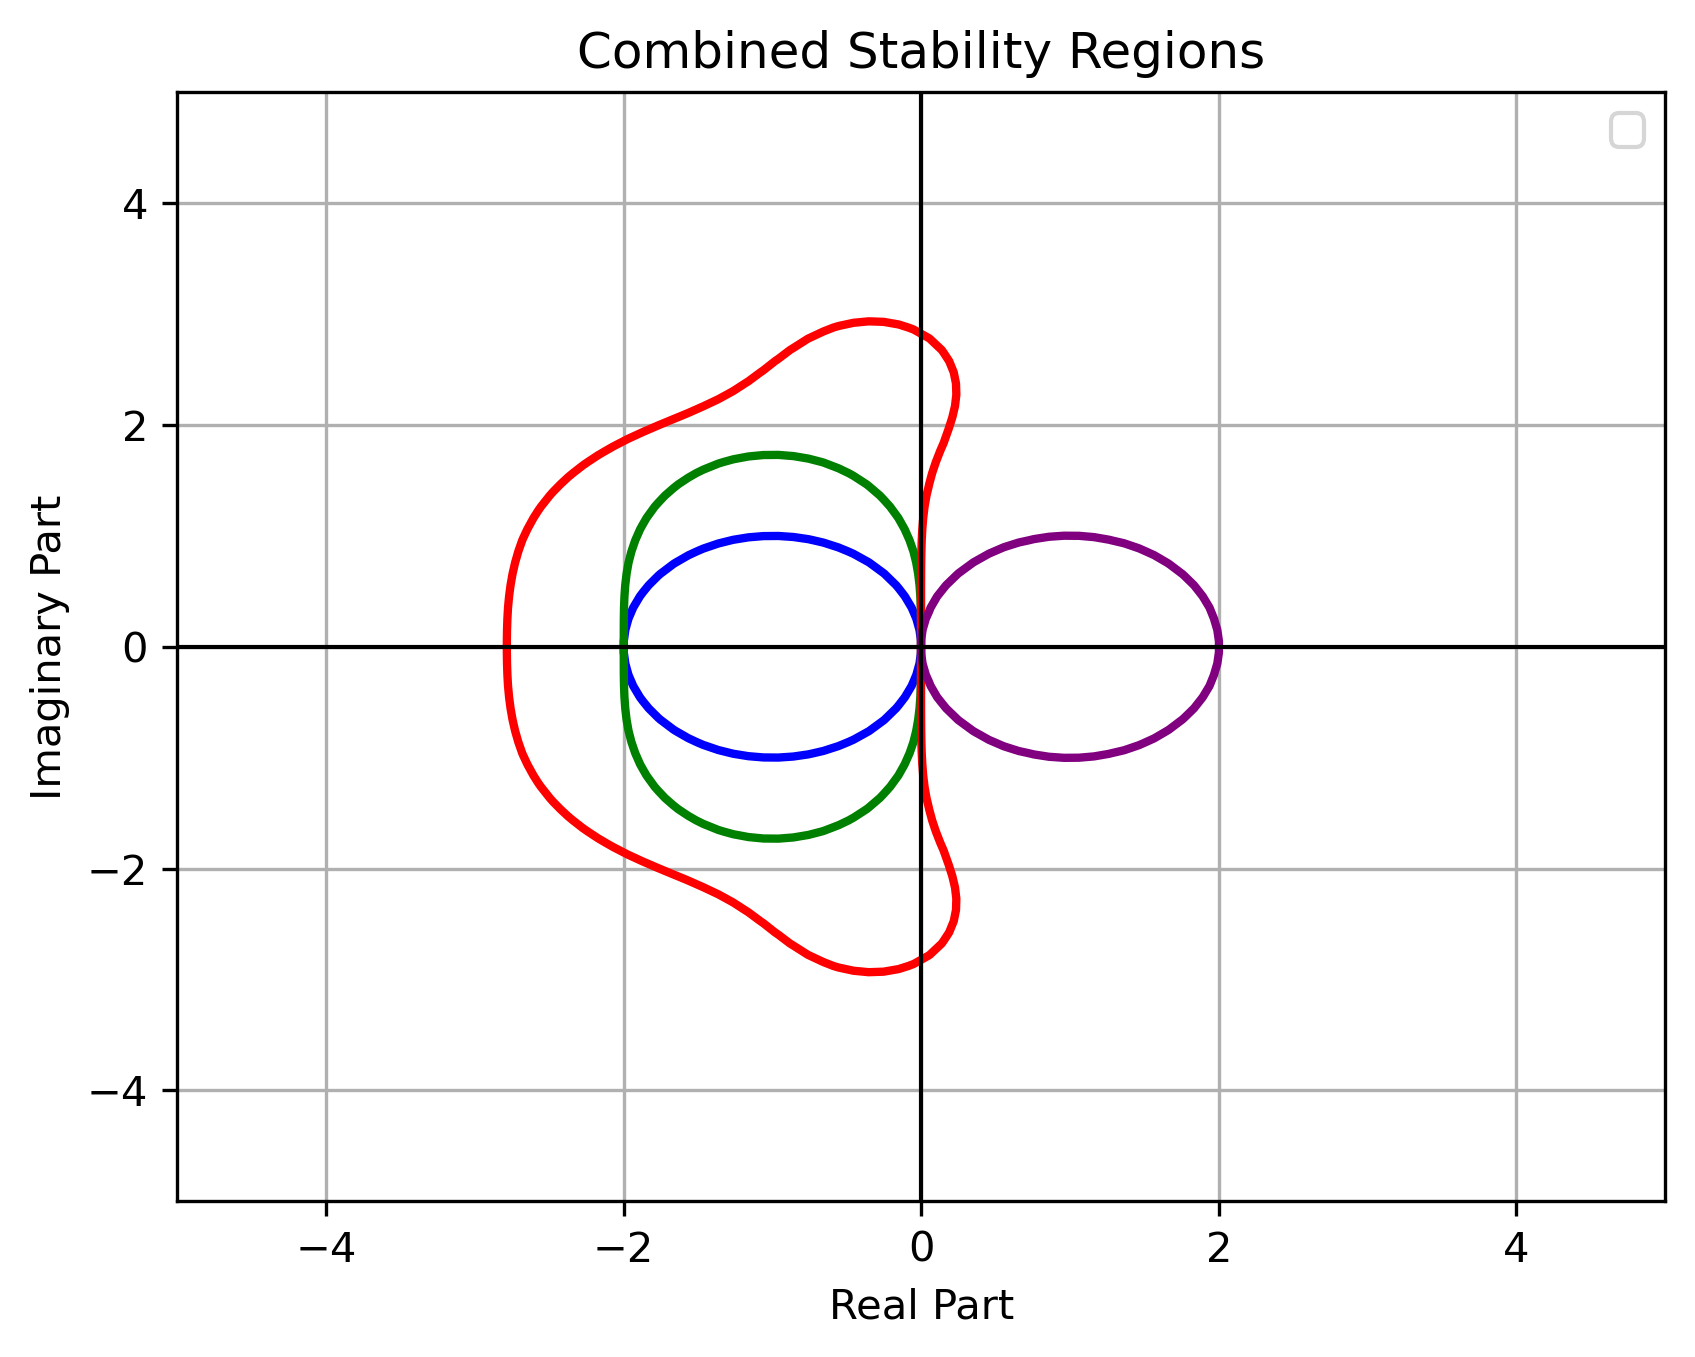

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


def plot_combined_stability_regions():
    # Define the plot area and colors for different methods
    xlim = (-5, 5)
    ylim = (-5, 5)
    colors = {
        'Euler': 'blue', 
        'RK2': 'green', 
        'RK4': 'red', 
        'Backward Euler': 'purple', 
    }
    methods = [R_euler, R_rk2, R_rk4, R_backward_euler]
    titles = ['Euler', 'RK2', 'RK4', 'Backward Euler']
    
    contour_handles = []

    # Create meshgrid for complex plane
    x = np.linspace(xlim[0], xlim[1], 100)
    y = np.linspace(ylim[0], ylim[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = X + 1.0j * Y

    for R, title in zip(methods, titles):
        magnitude = np.abs(R(Z))
        # Plot with label for legend
        contour = plt.contour(X, Y, magnitude, levels=[1], colors=[colors[title]], linewidths=2)
        contour_handles.append(contour.collections[0])

    # Background and labels
    plt.fill_between([xlim[0], xlim[1]], [ylim[0], ylim[0]], [ylim[1], ylim[1]], color='white')
    plt.title('Combined Stability Regions')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.grid(True)

    # Add x and y axis lines
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    
    # Add legend
    plt.legend(handles=contour_handles, loc='upper right')

    # Save and show plot
    plt.savefig('combined_stability_regions.png', dpi=300)
    plt.show()

# Stability functions for different methods
def R_euler(z):
    return 1 + z

def R_rk2(z):
    return 1 + z + z**2 / 2

def R_rk4(z):
    return 1 + z + z**2 / 2 + z**3 / 6 + z**4 / 24

def R_backward_euler(z):
    return 1 / (1 - z)

# Execute plot function with corrected legend
plot_combined_stability_regions()


/tmp/ipykernel_26219/2863038387.py:31: UserWarning: The following kwargs were not used by contour: 'label'
  contour = plt.contour(X, Y, magnitude, levels=[1], colors=[colors[title]], linewidths=2, label=title)
/tmp/ipykernel_26219/2863038387.py:33: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:


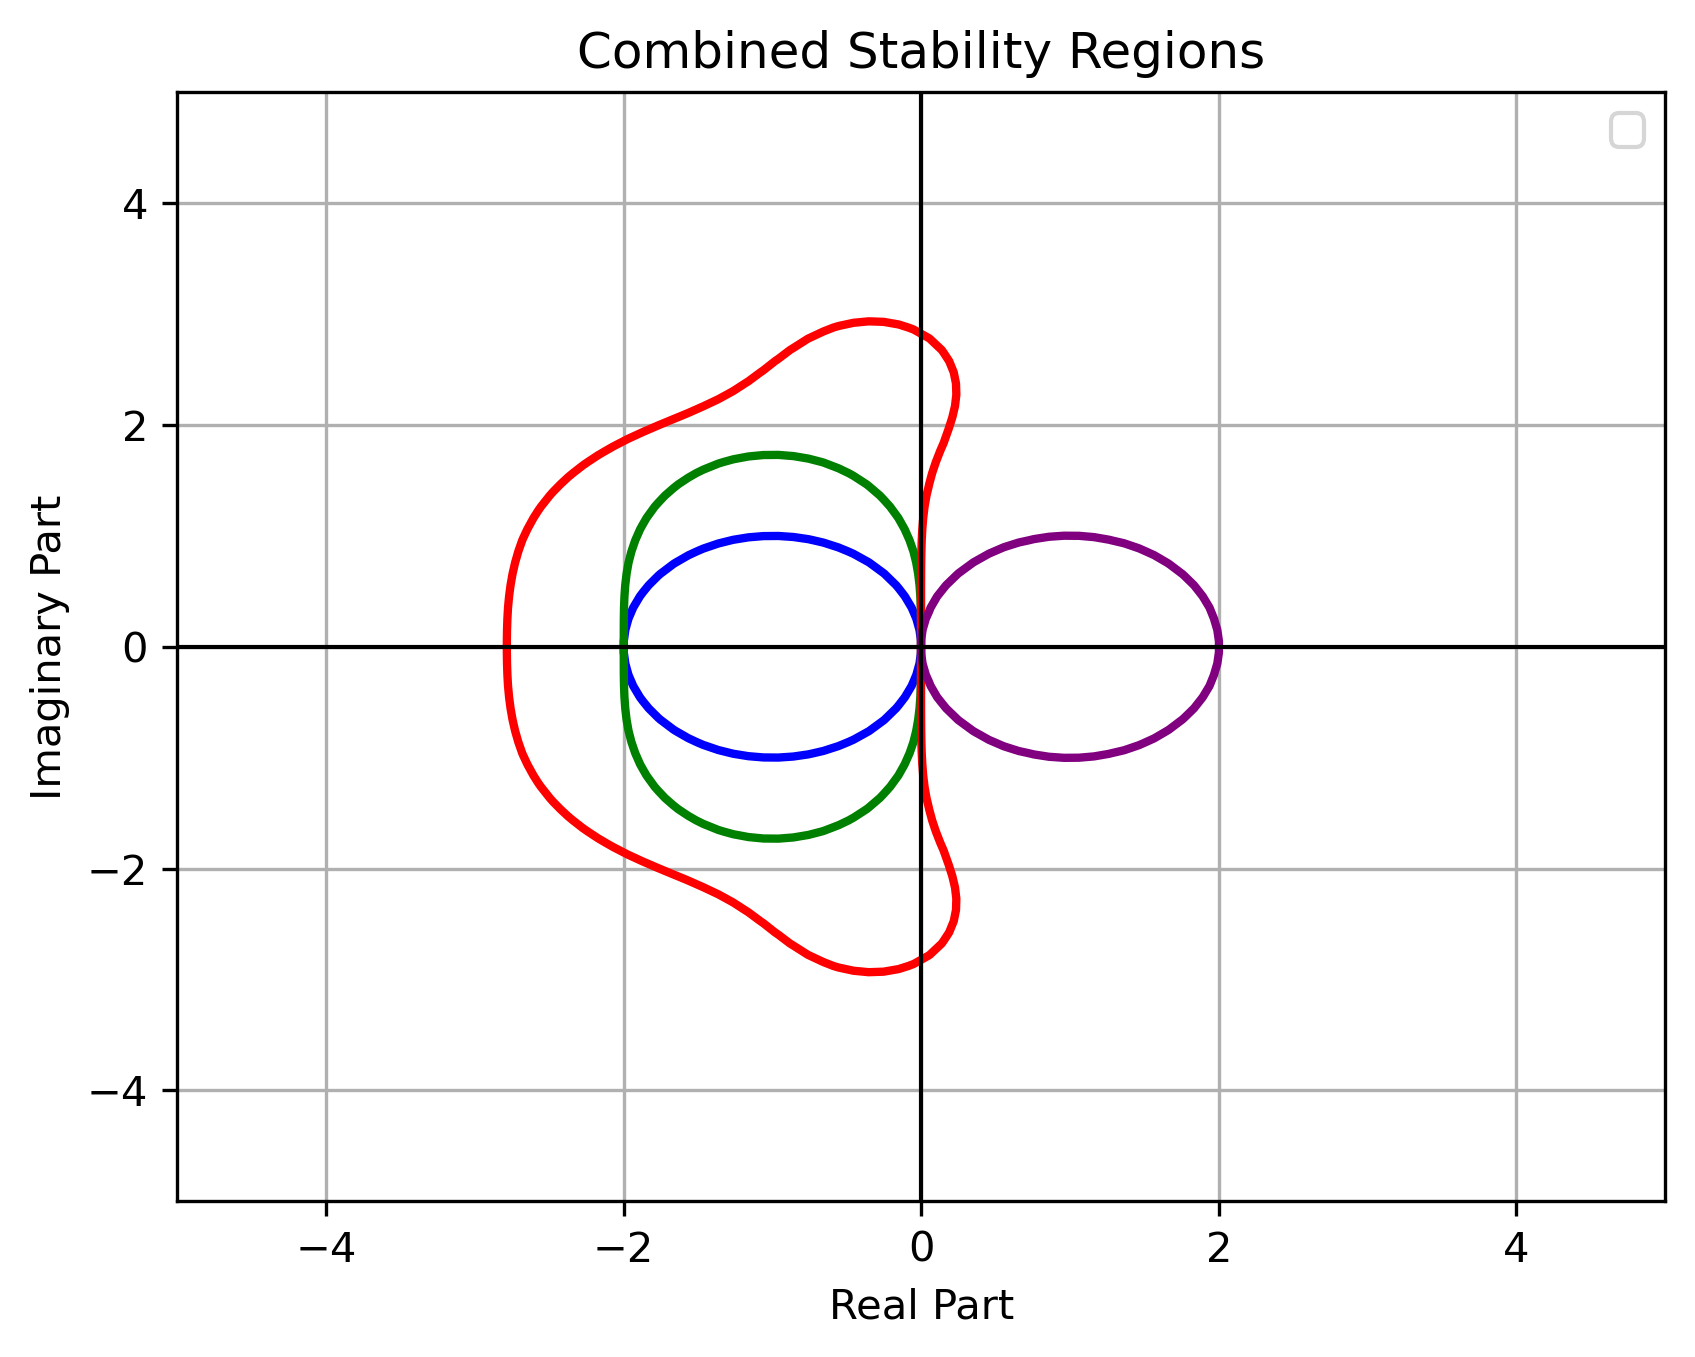

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300

def plot_combined_stability_regions():
    # Define the plot area and colors for different methods
    xlim = (-5, 5)
    ylim = (-5, 5)
    colors = {
        'Euler': 'blue', 
        'RK2': 'green', 
        'RK4': 'red', 
        'Backward Euler': 'purple', 
    }
    methods = [R_euler, R_rk2, R_rk4, R_backward_euler]
    titles = ['Euler', 'RK2', 'RK4', 'Backward Euler']

    # Create meshgrid for complex plane
    x = np.linspace(xlim[0], xlim[1], 100)
    y = np.linspace(ylim[0], ylim[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = X + 1.0j * Y

    contour_handles = []

    for R, title in zip(methods, titles):
        magnitude = np.abs(R(Z))
        # Plot with label for legend
        contour = plt.contour(X, Y, magnitude, levels=[1], colors=[colors[title]], linewidths=2, label=title)
        # Filter out any empty contour segments
        for collection in contour.collections:
            if collection.get_paths():
                contour_handles.append(collection)

    # Background and labels
    plt.fill_between([xlim[0], xlim[1]], [ylim[0], ylim[0]], [ylim[1], ylim[1]], color='white')
    plt.title('Combined Stability Regions')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.grid(True)

    # Add x and y axis lines
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    
    # Add legend, filtering out artists with labels starting with an underscore
    plt.legend(handles=[h for h in contour_handles if not h.get_label().startswith('_')], loc='upper right')

    # Save and show plot
    plt.savefig('combined_stability_regions.png', dpi=300)
    plt.show()

# Stability functions for different methods
def R_euler(z):
    return 1 + z

def R_rk2(z):
    return 1 + z + z**2 / 2

def R_rk4(z):
    return 1 + z + z**2 / 2 + z**3 / 6 + z**4 / 24

def R_backward_euler(z):
    return 1 / (1 - z)

# Execute plot function with corrected legend
plot_combined_stability_regions()
